# Project 8 -- Aditya Mishra

**TA Help:** N/A
    
**Collaboration:** N/A

In [3]:
options(jupyter.rich_display = F)

In [4]:
library(data.table)
products <- fread("/anvil/projects/tdm/data/icecream/combined/products.csv")
reviews <- fread("/anvil/projects/tdm/data/icecream/combined/reviews.csv")

## Question 1

In [5]:
getingredients <- function(x) {
    unique(trimws(unlist(strsplit(x, ",|\\(|\\)"))))
}

In [6]:
getingredients(products$ingredients[3])

 [1] "CREAM"                      "LIQUID SUGAR"              
 [3] "SUGAR"                      "WATER"                     
 [5] ""                           "SKIM MILK"                 
 [7] "COCOA"                      "PROCESSED WITH ALKALI"     
 [9] "POTATO"                     "COCONUT OIL"               
[11] "CORN SYRUP SOLIDS"          "SOYBEAN OIL"               
[13] "EGG YOLKS"                  "RICE STARCH"               
[15] "SUNFLOWER OIL"              "BARLEY MALT"               
[17] "COCOA POWDER"               "WHEAT FLOUR"               
[19] "MILK"                       "SALT"                      
[21] "SOY LECITHIN"               "YEAST EXTRACT"             
[23] "NATURAL FLAVOR"             "GUAR GUM"                  
[25] "SEA SALT"                   "MILKFAT"                   
[27] "VANILLA EXTRACT"            "ENZYMES"                   
[29] "CARRAGEENAN"                "BAKING SODA. CONTAINS MILK"
[31] "EGGS"                       "WHEAT AND SOY"      

In [7]:
tail(sort(table(unlist(sapply(products$ingredients, getingredients), use.names = FALSE))), 11)


    CORN SYRUP      EGG YOLKS          WATER    COCONUT OIL   SOY LECITHIN 
           122            123            124            137            139 
NATURAL FLAVOR      SKIM MILK                          SALT          SUGAR 
           148            148            150            160            212 
         CREAM 
           214 

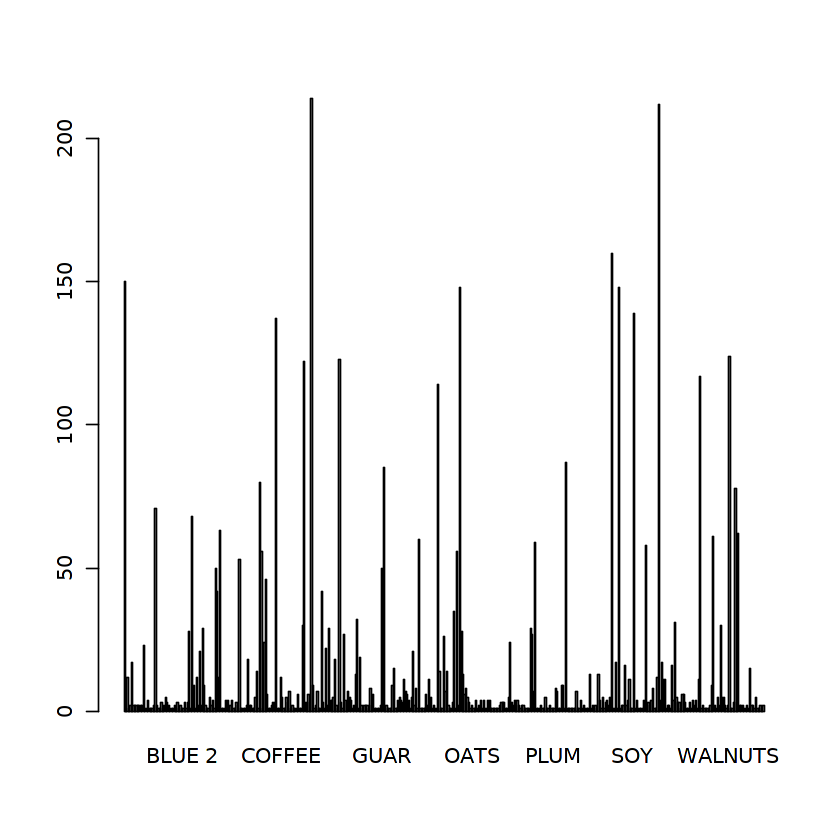

In [8]:
barplot(table(unlist(sapply(products$ingredients, getingredients), use.names = FALSE)))

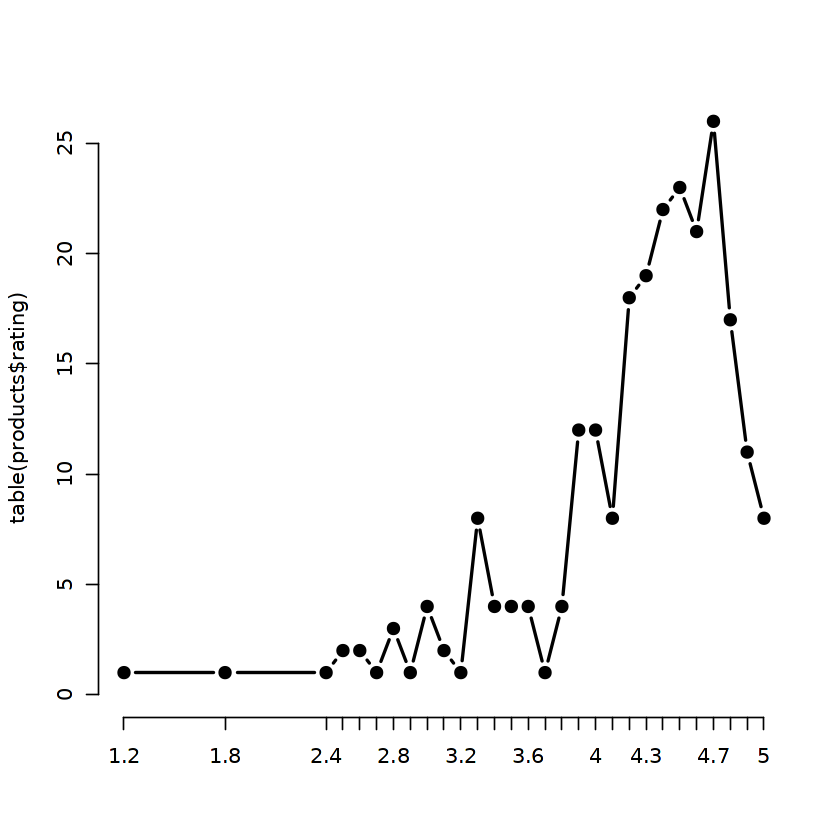

In [9]:
x = products$name
y = products$rating
plot(table(products$rating), type = "b", frame = FALSE, pch = 19)

1c. These graphs tell me the distribution of the prevalence of all ingredients used in different products, and the distribution of the ratings these products receive.

## Question 2

In [10]:
products_reviews_by_rating <- function(products_df, reviews_df, myrating) {
    merge_results <- merge(products_df, reviews_df, by="key")
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ]
    return(products_reviews_results)
}

## Question 3

In [11]:
#define function which takes 3 arguments - "products_df", "reviews_df", "myrating"
products_reviews_by_rating <- function(products_df, reviews_df, myrating) { 
    #merge the dataframes "products_df" and "reviews_df" by the column "key" to create a new dataframe "merge_results"
    merge_results <- merge(products_df, reviews_df, by="key")
    #filter "merge_results" to select rows where the "rating" column is greater than or equal to the provided "myrating" parameter and create a new dataframe "products_reviews_results"
    products_reviews_results <- merge_results[merge_results$rating >= myrating, ]
    #returns the newly created dataframe "products_reviews_results"
    return(products_reviews_results)
}

## Question 4

In [13]:
my_selection <- products_reviews_by_rating(products, reviews, 4.5)

In [14]:
str(my_selection)

Classes 'data.table' and 'data.frame':	10293 obs. of  20 variables:
 $ key          : chr  "0_hd" "0_hd" "0_hd" "0_hd" ...
 $ brand.x      : chr  "hd" "hd" "hd" "hd" ...
 $ name         : chr  "White Chocolate Raspberry Truffle Ice Cream" "White Chocolate Raspberry Truffle Ice Cream" "White Chocolate Raspberry Truffle Ice Cream" "White Chocolate Raspberry Truffle Ice Cream" ...
 $ subhead      : chr  "" "" "" "" ...
 $ description  : chr  "A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream a"| __truncated__ "A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream a"| __truncated__ "A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream a"| __truncated__ "A truly exquisite ice cream inspired by fine chocolate truffles. We begin with pure white chocolate ice cream a"| __truncated__ ...
 $ rating       : num  4.9 4.9 4.9 4.

4a. It has 10293 rows.

## Question 5

In [20]:
products_with_ingredient <- function(ingredient) {
    contains_ingredient <- grepl(ingredient, products$ingredients)
    num <- sum(contains_ingredient)
    return(num)
}

In [21]:
products_with_ingredient("SALT")

[1] 164

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.